<a href="https://colab.research.google.com/github/walmirpacheco/Projeto_Transfer-Learning-em-uma-rede-de-Deep-Learning/blob/main/Transfer_Learning_em_uma_rede_de_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from google.colab import files
import shutil
import random

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# 1. ESTRUTURA DE DIRETÓRIOS
# Limpar diretórios anteriores se existirem
if os.path.exists('/content/cats_dogs_dataset'):
    shutil.rmtree('/content/cats_dogs_dataset')

# Criar nova estrutura
base_dir = '/content/cats_dogs_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Criar diretórios para treino
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)

# Criar diretórios para validação
os.makedirs(os.path.join(validation_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'dogs'), exist_ok=True)

# Criar diretórios para teste
os.makedirs(os.path.join(test_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dogs'), exist_ok=True)

print("✅ Estrutura de diretórios criada:")
print(f"   - {train_dir}")
print(f"   - {validation_dir}")
print(f"   - {test_dir}")

✅ Estrutura de diretórios criada:
   - /content/cats_dogs_dataset/train
   - /content/cats_dogs_dataset/validation
   - /content/cats_dogs_dataset/test


In [18]:
# 2. FUNÇÃO PARA UPLOAD E ORGANIZAÇÃO DAS IMAGENS
def upload_and_organize_images():
    """
    Função para fazer upload e organizar as imagens
    """
    all_images = []

    # Upload das imagens de gatos
    print("\n" + "="*50)
    print("📤 UPLOAD DAS IMAGENS DE GATOS")
    print("="*50)
    print("Selecione as imagens de GATOS (múltiplos arquivos: Ctrl+Click ou Cmd+Click)")
    cat_uploads = files.upload()

    temp_cat_dir = '/content/temp_cats'
    os.makedirs(temp_cat_dir, exist_ok=True)

    for filename, content in cat_uploads.items():
        filepath = os.path.join(temp_cat_dir, filename)
        with open(filepath, 'wb') as f:
            f.write(content)
        all_images.append(('cat', filepath))

    print(f"✅ {len(cat_uploads)} imagens de gatos carregadas")

    # Upload das imagens de cachorros
    print("\n" + "="*50)
    print("📤 UPLOAD DAS IMAGENS DE CACHORROS")
    print("="*50)
    print("Selecione as imagens de CACHORROS (múltiplos arquivos: Ctrl+Click ou Cmd+Click)")
    dog_uploads = files.upload()

    temp_dog_dir = '/content/temp_dogs'
    os.makedirs(temp_dog_dir, exist_ok=True)

    for filename, content in dog_uploads.items():
        filepath = os.path.join(temp_dog_dir, filename)
        with open(filepath, 'wb') as f:
            f.write(content)
        all_images.append(('dog', filepath))

    print(f"✅ {len(dog_uploads)} imagens de cachorros carregadas")

    return all_images, len(cat_uploads), len(dog_uploads)

In [19]:
# 3. DIVIDIR DADOS EM TREINO, VALIDAÇÃO E TESTE
def split_dataset(all_images, train_pct=0.7, val_pct=0.15):
    """
    Divide as imagens em treino, validação e teste
    """
    # Embaralhar imagens
    random.shuffle(all_images)

    n_total = len(all_images)
    n_train = int(n_total * train_pct)
    n_val = int(n_total * val_pct)

    train_images = all_images[:n_train]
    val_images = all_images[n_train:n_train+n_val]
    test_images = all_images[n_train+n_val:]

    return train_images, val_images, test_images

def copy_images_to_dirs(images, dest_base_dir):
    """
    Copia as imagens para os diretórios de destino
    """
    cats_count = 0
    dogs_count = 0

    for img_type, img_path in images:
        if img_type == 'cat':
            dest_dir = os.path.join(dest_base_dir, 'cats')
            cats_count += 1
        else:
            dest_dir = os.path.join(dest_base_dir, 'dogs')
            dogs_count += 1

        # Copiar arquivo
        filename = os.path.basename(img_path)
        dest_path = os.path.join(dest_dir, filename)
        shutil.copy2(img_path, dest_path)

    return cats_count, dogs_count

In [20]:
# 4. EXECUTAR O PROCESSO COMPLETO
print("\n🚀 INICIANDO PROCESSO DE UPLOAD E ORGANIZAÇÃO DOS DADOS...")

# Fazer upload das imagens
all_images, n_cats, n_dogs = upload_and_organize_images()

print(f"\n📊 Total de imagens carregadas: {len(all_images)}")
print(f"   - Gatos: {n_cats}")
print(f"   - Cachorros: {n_dogs}")

# Verificar se há imagens suficientes
if len(all_images) < 10:
    raise ValueError("Número insuficiente de imagens! Carregue pelo menos 10 imagens no total.")

# Dividir dataset
train_images, val_images, test_images = split_dataset(all_images)

# Copiar imagens para os diretórios
print("\n📁 Organizando imagens nos diretórios...")

# Treino
train_cats, train_dogs = copy_images_to_dirs(train_images, train_dir)
print(f"Treino: {train_cats} gatos, {train_dogs} cachorros")

# Validação
val_cats, val_dogs = copy_images_to_dirs(val_images, validation_dir)
print(f"Validação: {val_cats} gatos, {val_dogs} cachorros")

# Teste
test_cats, test_dogs = copy_images_to_dirs(test_images, test_dir)
print(f"Teste: {test_cats} gatos, {test_dogs} cachorros")

# Limpar diretórios temporários
shutil.rmtree('/content/temp_cats', ignore_errors=True)
shutil.rmtree('/content/temp_dogs', ignore_errors=True)

print("\n✅ Dataset organizado com sucesso!")


🚀 INICIANDO PROCESSO DE UPLOAD E ORGANIZAÇÃO DOS DADOS...

📤 UPLOAD DAS IMAGENS DE GATOS
Selecione as imagens de GATOS (múltiplos arquivos: Ctrl+Click ou Cmd+Click)


Saving 01.jpg to 01 (4).jpg
Saving 02.jpg to 02 (4).jpg
Saving 03.jpg to 03 (4).jpg
Saving 04.jpg to 04 (4).jpg
Saving 05.jpg to 05 (4).jpg
Saving 06.jpg to 06 (4).jpg
Saving 07.jpg to 07 (4).jpg
Saving 08.jpg to 08 (4).jpg
Saving 09.jpg to 09 (4).jpg
Saving 10.jpg to 10 (4).jpg
Saving 11.jpg to 11 (4).jpg
Saving 13.jpg to 13 (4).jpg
Saving 14.jpg to 14 (4).jpg
Saving 15.jpg to 15 (4).jpg
Saving 16.jpg to 16 (4).jpg
Saving 17.jpg to 17 (4).jpg
Saving 18.jpg to 18 (4).jpg
Saving 19.jpg to 19 (4).jpg
Saving 20.jpg to 20 (4).jpg
Saving 21.jpg to 21 (4).jpg
Saving 22.jpg to 22 (4).jpg
Saving 23.jpg to 23 (4).jpg
Saving 24.jpg to 24 (4).jpg
Saving 25.jpg to 25 (4).jpg
Saving 26.jpg to 26 (4).jpg
Saving 27.jpg to 27 (4).jpg
Saving 28.jpg to 28 (4).jpg
Saving 29.jpg to 29 (4).jpg
Saving 30.jpg to 30 (4).jpg
Saving 31.jpg to 31 (4).jpg
Saving 32.jpg to 32 (4).jpg
Saving 33.jpg to 33 (4).jpg
Saving 34.jpg to 34 (4).jpg
Saving 35.jpg to 35 (4).jpg
Saving 36.jpg to 36 (4).jpg
Saving 37.jpg to 37 

Saving 01.jpg to 01 (5).jpg
Saving 02.jpg to 02 (5).jpg
Saving 03.jpg to 03 (5).jpg
Saving 04.jpg to 04 (5).jpg
Saving 05.jpg to 05 (5).jpg
Saving 06.jpg to 06 (5).jpg
Saving 07.jpg to 07 (5).jpg
Saving 08.jpg to 08 (5).jpg
Saving 09.jpg to 09 (5).jpg
Saving 10.jpg to 10 (5).jpg
Saving 11.jpg to 11 (5).jpg
Saving 13.jpg to 13 (5).jpg
Saving 14.jpg to 14 (5).jpg
Saving 15.jpg to 15 (5).jpg
Saving 16.jpg to 16 (5).jpg
Saving 17.jpg to 17 (5).jpg
Saving 18.jpg to 18 (5).jpg
Saving 19.jpg to 19 (5).jpg
Saving 20.jpg to 20 (5).jpg
Saving 21.jpg to 21 (5).jpg
Saving 22.jpg to 22 (5).jpg
Saving 23.jpg to 23 (5).jpg
Saving 24.jpg to 24 (5).jpg
Saving 25.jpg to 25 (5).jpg
Saving 26.jpg to 26 (5).jpg
Saving 27.jpg to 27 (5).jpg
Saving 28.jpg to 28 (5).jpg
Saving 29.jpg to 29 (5).jpg
Saving 30.jpg to 30 (5).jpg
Saving 31.jpg to 31 (5).jpg
Saving 32.jpg to 32 (5).jpg
Saving 33.jpg to 33 (5).jpg
Saving 34.jpg to 34 (5).jpg
Saving 35.jpg to 35 (5).jpg
Saving 36.jpg to 36 (5).jpg
Saving 37.jpg to 37 

In [21]:
# 5. VERIFICAR ESTRUTURA DOS DADOS
def check_dataset_structure():
    """
    Verifica se os diretórios contêm imagens
    """
    print("\n🔍 Verificando estrutura do dataset:")

    for split in ['train', 'validation', 'test']:
        for class_name in ['cats', 'dogs']:
            path = os.path.join(base_dir, split, class_name)
            n_files = len([f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"   {split}/{class_name}: {n_files} imagens")

            if n_files == 0:
                raise ValueError(f"ERRO: {path} está vazio!")

check_dataset_structure()


🔍 Verificando estrutura do dataset:
   train/cats: 65 imagens
   train/dogs: 73 imagens
   validation/cats: 15 imagens
   validation/dogs: 14 imagens
   test/cats: 19 imagens
   test/dogs: 12 imagens


In [22]:
# 6. DATA AUGMENTATION E GERADORES
IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation para treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apenas normalização para validação e teste
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Criar geradores
print("\n🔄 Criando geradores de dados...")

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['cats', 'dogs'],
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['cats', 'dogs'],
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['cats', 'dogs'],
    shuffle=False
)

# Verificar se os geradores não estão vazios
if train_generator.samples == 0:
    raise ValueError("ERRO: Gerador de treino está vazio!")
if validation_generator.samples == 0:
    raise ValueError("ERRO: Gerador de validação está vazio!")
if test_generator.samples == 0:
    raise ValueError("ERRO: Gerador de teste está vazio!")

print(f"\n✅ Geradores criados com sucesso:")
print(f"   - Treino: {train_generator.samples} amostras")
print(f"   - Validação: {validation_generator.samples} amostras")
print(f"   - Teste: {test_generator.samples} amostras")
print(f"   - Classes: {train_generator.class_indices}")



🔄 Criando geradores de dados...
Found 138 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Found 31 images belonging to 2 classes.

✅ Geradores criados com sucesso:
   - Treino: 138 amostras
   - Validação: 29 amostras
   - Teste: 31 amostras
   - Classes: {'cats': 0, 'dogs': 1}


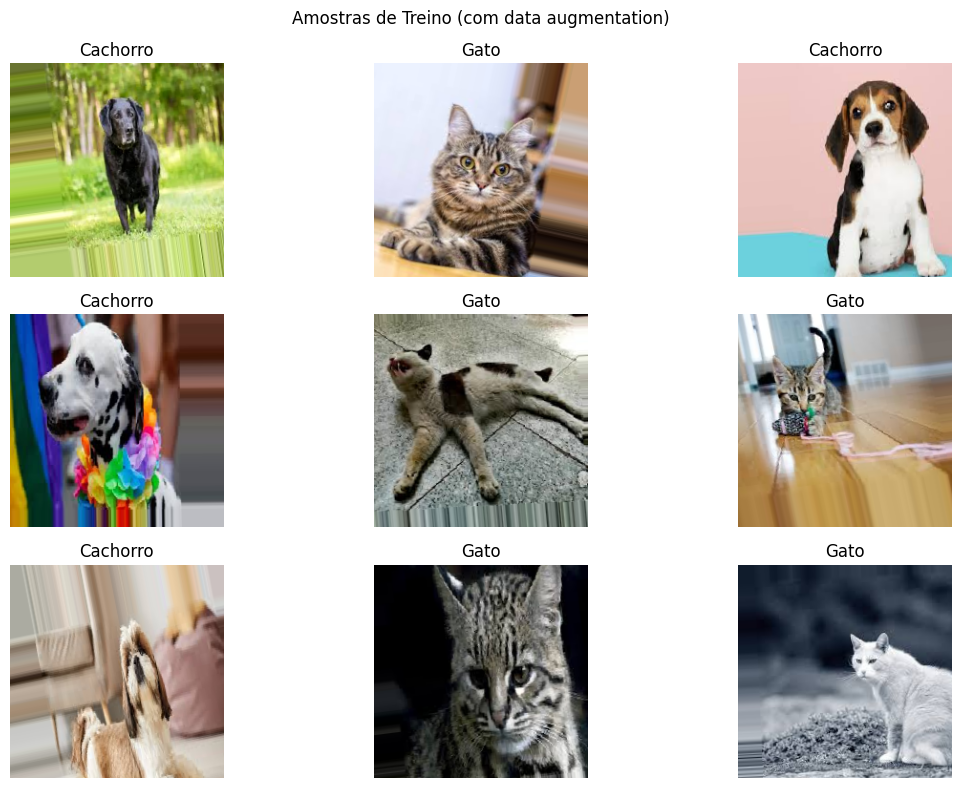

In [23]:
# 7. VISUALIZAR AMOSTRAS
def plot_samples(generator, title):
    plt.figure(figsize=(12, 8))
    images, labels = next(generator)

    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"{'Cachorro' if labels[i] == 1 else 'Gato'}")
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_samples(train_generator, "Amostras de Treino (com data augmentation)")

In [24]:
# 8. CRIAR MODELO COM TRANSFER LEARNING
# Carregar VGG16 pré-treinado
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Congelar camadas do modelo base
base_model.trainable = False

# Criar modelo completo
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n📋 Resumo do modelo:")
model.summary()


📋 Resumo do modelo:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
# 9. TREINAMENTO - FASE 1
# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_model_phase1.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Calcular steps
steps_per_epoch = max(1, train_generator.samples // BATCH_SIZE)
validation_steps = max(1, validation_generator.samples // BATCH_SIZE)

print(f"\n🚀 Iniciando treinamento - Fase 1 (camadas congeladas)")
print(f"Steps por época: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

history_phase1 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)


🚀 Iniciando treinamento - Fase 1 (camadas congeladas)
Steps por época: 4
Validation steps: 1
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5567 - loss: 0.6809 
Epoch 1: val_accuracy improved from -inf to 0.55172, saving model to best_model_phase1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 85s 21s/step - accuracy: 0.5529 - loss: 0.6866 - val_accuracy: 0.5517 - val_loss: 0.6844 - learning_rate: 1.0000e-04
Epoch 2/15
1/4 ━━━━━━━━━━━━━━━━━━━━ 1:01 20s/step - accuracy: 0.5312 - loss: 0.7262
Epoch 2: val_accuracy did not improve from 0.55172
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.5312 - loss: 0.7262 - val_accuracy: 0.5172 - val_loss: 0.6837 - learning_rate: 1.0000e-04
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.4930 - loss: 0.7191 
Epoch 3: val_accuracy did not improve from 0.55172
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 21s/step - accuracy: 0.4982 - loss: 0.7173 - val_accuracy: 0.5172 - val_loss: 0.6815 - learning_rate: 1.0000e-04
Epoch 4/15
1/4 ━━━━━━━━━━━━━━━━━━━━ 55s 19s/step - accuracy: 0.6250 - loss: 0.7099
Epoch 4: val_accuracy did not improve from 0.55172
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.6250 - loss: 0.7099 - val_accuracy: 0.5172 - val_loss: 0.6811 - learning_rate: 1.0000e-04
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 21s/step - accuracy: 0.5773 - loss: 0.7028 - val_accuracy: 0.5862 - val_loss: 0.6801 - learning_rate: 1.0000e-04
Epoch 6/15
1/4 ━━━━━━━━━━━━━━━━━━━━ 55s 18s/step - accuracy: 0.3438 - loss: 0.7712
Epoch 6: val_accuracy did not improve from 0.58621
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 6s/step - accuracy: 0.3438 - loss: 0.7712 - val_accuracy: 0.5517 - val_loss: 0.6797 - learning_rate: 1.0000e-04
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5730 - loss: 0.6906 
Epoch 7: val_accuracy did not improve from 0.58621
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 21s/step - accuracy: 0.5678 - loss: 0.6962 - val_accuracy: 0.5517 - val_loss: 0.6778 - learning_rate: 1.0000e-04
Epoch 8/15
1/4 ━━━━━━━━━━━━━━━━━━━━ 59s 20s/step - accuracy: 0.5000 - loss: 0.6816
Epoch 8: val_accuracy did not improve from 0.58621
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.5000 - loss: 0.6816 - val_accuracy: 0.5517 - val_loss: 0.6775 - learning_rate: 1.0000e-04
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 21s/step - accuracy: 0.5915 - loss: 0.6983 - val_accuracy: 0.6207 - val_loss: 0.6718 - learning_rate: 1.0000e-04
Epoch 12/15
1/4 ━━━━━━━━━━━━━━━━━━━━ 59s 20s/step - accuracy: 0.5938 - loss: 0.6040
Epoch 12: val_accuracy did not improve from 0.62069
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.5938 - loss: 0.6040 - val_accuracy: 0.6207 - val_loss: 0.6709 - learning_rate: 1.0000e-04
Epoch 13/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5302 - loss: 0.6748 
Epoch 13: val_accuracy did not improve from 0.62069
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 21s/step - accuracy: 0.5242 - loss: 0.6796 - val_accuracy: 0.5862 - val_loss: 0.6676 - learning_rate: 1.0000e-04
Epoch 14/15
1/4 ━━━━━━━━━━━━━━━━━━━━ 55s 19s/step - accuracy: 0.5312 - loss: 0.6985
Epoch 14: val_accuracy did not improve from 0.62069
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.5312 - loss: 0.6985 - val_accuracy: 0.5862 - val_loss: 0.6667 - learning_rate: 1.0000e-04
Epoch 15/15
4/4 ━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 119s 25s/step - accuracy: 0.4896 - loss: 0.7326 - val_accuracy: 0.6897 - val_loss: 0.6636 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 15.


In [28]:
# 10. FINE-TUNING - FASE 2
# Descongelar algumas camadas
base_model.trainable = True
for layer in base_model.layers[:15]:
    layer.trainable = False

# Recompilar com learning rate menor
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n🚀 Iniciando Fine-tuning - Fase 2")

history_phase2 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

# Combinar históricos
history = {}
for key in history_phase1.history.keys():
    history[key] = history_phase1.history[key] + history_phase2.history[key]


🚀 Iniciando Fine-tuning - Fase 2
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.6984 - loss: 0.6046 
Epoch 1: val_accuracy did not improve from 0.79310
4/4 ━━━━━━━━━━━━━━━━━━━━ 104s 26s/step - accuracy: 0.6889 - loss: 0.6092 - val_accuracy: 0.7586 - val_loss: 0.6305 - learning_rate: 1.0000e-05
Epoch 2/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 1:11 24s/step - accuracy: 0.5938 - loss: 0.6916
Epoch 2: val_accuracy did not improve from 0.79310
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.5938 - loss: 0.6916 - val_accuracy: 0.7241 - val_loss: 0.6284 - learning_rate: 1.0000e-05
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.6484 - loss: 0.6308 
Epoch 3: val_accuracy did not improve from 0.79310
4/4 ━━━━━━━━━━━━━━━━━━━━ 172s 29s/step - accuracy: 0.6469 - loss: 0.6321 - val_accuracy: 0.7586 - val_loss: 0.6195 - learning_rate: 1.0000e-05
Epoch 4/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.6000 - loss: 0.5985
Epoch 4: val_accuracy did not improve from 0.79310
4/4

In [34]:
try:
    # Se test_accuracy não existir, tentar obter do último modelo
    if 'test_accuracy' not in dir() or test_accuracy is None:
        print("\n🔄 Avaliando modelo no conjunto de teste para o resumo final...")
        test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
        print(f"✅ Avaliação concluída: Acurácia = {test_accuracy:.4f}")
except:
    # Se falhar, usar valores do último epoch de validação
    if 'history' in dir() and history:
        test_accuracy = history['val_accuracy'][-1] if history['val_accuracy'] else 0
        test_loss = history['val_loss'][-1] if history['val_loss'] else 0
        print("⚠️ Usando última acurácia de validação para o resumo")
    else:
        test_accuracy = 0
        test_loss = 0
        print("⚠️ Não foi possível obter métricas de avaliação")

# Números do dataset
try:
    total_images = (train_generator.samples + validation_generator.samples + test_generator.samples)
    train_samples = train_generator.samples
    val_samples = validation_generator.samples
    test_samples = test_generator.samples
except:
    total_images = "N/A"
    train_samples = "N/A"
    val_samples = "N/A"
    test_samples = "N/A"

print("\n" + "="*50)
print("✅ PROJETO CONCLUÍDO COM SUCESSO!")
print("="*50)
print(f"""
📊 RESUMO DO PROJETO:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📁 Dados:
   - Total: {total_images} imagens
   - Treino: {train_samples} imagens
   - Validação: {val_samples} imagens
   - Teste: {test_samples} imagens

🎯 Performance:
   - Acurácia no teste: {test_accuracy:.2%}
   - Loss no teste: {test_loss:.4f}

📦 Modelo:
   - Arquitetura: VGG16 + Transfer Learning
   - Fine-tuning: Aplicado em 2 fases
   - Data Augmentation: Utilizado no treino
   - Arquivo salvo: cats_dogs_transfer_learning_final.h5

📈 Visualizações disponíveis:
   - Histórico de treinamento
   - Matriz de confusão
   - Amostras de predições

💾 Arquivos gerados:
   - best_model_phase1.h5 (modelo após 1ª fase)
   - best_model_phase2.h5 (modelo após fine-tuning)
   - cats_dogs_transfer_learning_final.h5 (modelo final)

📌 Como usar o modelo salvo:
   ```python
   from tensorflow.keras.models import load_model
   model = load_model('Transfer Learning em uma rede de Deep Learning.ipynb')

""")


✅ PROJETO CONCLUÍDO COM SUCESSO!

📊 RESUMO DO PROJETO:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📁 Dados:
   - Total: 198 imagens
   - Treino: 138 imagens
   - Validação: 29 imagens
   - Teste: 31 imagens

🎯 Performance:
   - Acurácia no teste: 67.74%
   - Loss no teste: 0.6288

📦 Modelo:
   - Arquitetura: VGG16 + Transfer Learning
   - Fine-tuning: Aplicado em 2 fases
   - Data Augmentation: Utilizado no treino
   - Arquivo salvo: cats_dogs_transfer_learning_final.h5

📈 Visualizações disponíveis:
   - Histórico de treinamento
   - Matriz de confusão
   - Amostras de predições

💾 Arquivos gerados:
   - best_model_phase1.h5 (modelo após 1ª fase)
   - best_model_phase2.h5 (modelo após fine-tuning)
   - cats_dogs_transfer_learning_final.h5 (modelo final)

📌 Como usar o modelo salvo:
   ```python
   from tensorflow.keras.models import load_model
   model = load_model('Transfer Learning em uma rede de Deep Learning.ipynb')


